In [1]:
#Importing Libraries

import pandas as pd;
import pickle;
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
#Read Data set
df=pd.read_csv("autos.csv",encoding="latin-1")

In [3]:
df

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

In [4]:
df.abtest.unique()

array(['test', 'control'], dtype=object)

In [5]:
df.lastSeen.unique()

array(['2016-04-07 03:16:57', '2016-04-07 01:46:50',
       '2016-04-05 12:47:46', ..., '2016-03-19 20:44:43',
       '2016-03-29 10:17:23', '2016-03-21 10:42:49'], dtype=object)

In [6]:
deleteList=["nrOfPictures","lastSeen","offerType","seller","dateCrawled","dateCreated"]
df.drop(deleteList,axis=1,inplace=True)

In [7]:
hpUnique=df.powerPS.unique();

In [8]:
hpUnique.sort()

In [9]:
hpUnique

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

In [10]:
df = df[(df.powerPS > 60) & (df.powerPS < 500)]
df.shape

(290183, 14)

In [11]:
df.isnull().sum()

name                       0
price                      0
abtest                     0
vehicleType            18903
yearOfRegistration         0
gearbox                 4989
powerPS                    0
model                  11640
kilometer                  0
monthOfRegistration        0
fuelType               17375
brand                      0
notRepairedDamage      41447
postalCode                 0
dtype: int64

In [12]:
df["yearOfRegistration"].max()

9999

In [13]:
df = df[(df.yearOfRegistration > 1980) & (df.yearOfRegistration < 2019)]
df.shape

(288112, 14)

In [14]:
df


name  price   abtest  \
1                                    A5_Sportback_2.7_Tdi  18300     test   
2                          Jeep_Grand_Cherokee_"Overland"   9800     test   
3                                      GOLF_4_1_4__3TÜRER   1500     test   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600     test   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650     test   
...                                                   ...    ...      ...   
371520                                       turbo_defekt   3200  control   
371524              Smart_smart_leistungssteigerung_100ps   1199     test   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200     test   
371526                             VW_Golf_Kombi_1_9l_TDI   3400     test   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990  control   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
1            coupe                2011    manuell      190          NaN   
2              suv                2004  automatik      163        grand   
3       kleinwagen                2001    manuell       75         golf   
4       kleinwagen                2008    manuell       69        fabia   
5        limousine                1995    manuell      102          3er   
...            ...                 ...        ...      ...          ...   
371520   limousine                2004    manuell      225         leon   
371524      cabrio                2000  automatik      101       fortwo   
371525         bus                1996    manuell      102  transporter   
371526       kombi                2002    manuell      100         golf   
371527   limousine                2013    manuell      320      m_reihe   

        kilometer  monthOfRegistration fuelType       brand notRepairedDamage  \
1          125000                    5   diesel        audi                ja   
2          125000                    8   diesel        jeep               NaN   
3          150000                    6   benzin  volkswagen              nein   
4           90000                    7   diesel       skoda              nein   
5          150000                   10   benzin         bmw                ja   
...           ...                  ...      ...         ...               ...   
371520     150000                    5   benzin        seat                ja   
371524     125000                    3   benzin       smart              nein   
371525     150000                    3   diesel  volkswagen              nein   
371526     150000                    6   diesel  volkswagen               NaN   
371527      50000                    8   benzin         bmw              nein   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[288112 rows x 14 columns]

In [15]:
priceRange=df.price.unique()
priceRange.sort()
priceRange.mean()

82550.00327300731

In [16]:
df = df[(df.price > 200) & (df.price < 75000)]
df.shape

(279209, 14)

In [17]:
df.monthOfRegistration.unique()

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

In [18]:
df = df[(df.monthOfRegistration >= 1) & (df.monthOfRegistration <= 12)]
df.shape

(263758, 14)

In [19]:
df.notRepairedDamage.isnull().sum()

30335

In [20]:
df.model.unique()
modelList=['golf', 'grand', 'fabia', '3er', '2_reihe', 'c_max', '3_reihe',
       'passat', 'navara', 'twingo', 'a_klasse', 'scirocco', '5er',
       'meriva', 'andere', 'c4', 'civic', 'e_klasse', 'one', 'fortwo',
       'clio', '1er', 'b_klasse', 'punto', 'a8', 'jetta', 'astra',
       'c_klasse', 'micra', 'vito', 'sprinter', 'escort', 'forester',
       'xc_reihe', 'fiesta', 'scenic', 'a1', 'transporter', 'focus', 'a4',
       'tt', 'a6', 'jazz', 'omega', 'polo', 'slk', '7er', 'combo', '80',
       '147', 'glk', 'z_reihe', 'sportage', 'sorento', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'insignia', 'almera', 'megane', 'a3',
       'r19', 'mondeo', 'cordoba', 'colt', 'vectra', 'lupo', 'berlingo',
       'm_klasse', 'tiguan', '6_reihe', 'up', 'i_reihe', 'ceed', 'kangoo',
       '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe', 'corsa',
       '6er', 'panda', 'beetle', 'rio', 'touareg', 'logan', 'caddy',
       'spider', 's_max', 'modus', 'a2', 'x_reihe', 'a5', 'galaxy', 'c3',
       'viano', 's_klasse', '1_reihe', 'sharan', 'avensis', 'sl',
       'roomster', 'q5', 'santa', 'leon', 'cooper', '4_reihe',
       'ptcruiser', 'clk', 'primera', 'espace', 'exeo', '159', 'transit',
       'juke', 'ka', 'v40', 'carisma', 'accord', 'corolla', 'phaeton',
       'boxster', 'verso', 'rav', 'kuga', 'qashqai', 'swift', 'picanto',
       'superb', 'stilo', 'alhambra', 'm_reihe', 'roadster', 'ypsilon',
       'galant', 'justy', 'impreza', '90', 'sirion', 'signum',
       'crossfire', 'duster', 'v50', 'mx_reihe', 'discovery', 'c_reihe',
       'v_klasse', 'yaris', 'c5', 'aygo', 'cc', 'carnival', 'fusion',
       'bora', 'agila', '911', 'cl', 'tigra', '156', '300c', '500', '100',
       'q3', 'cr_reihe', 'spark', 'x_type', 'ducato', 's_type', 'x_trail',
       'toledo', 'altea', 'voyager', 'matiz', 'v70', 'bravo',
       'range_rover', 'tucson', 'fox', 'q7', 'c1', 'kadett', 'jimny',
       'cx_reihe', 'cayenne', 'wrangler', 'lybra', 'range_rover_sport',
       'lancer', 'freelander', 'captiva', 'laguna', 'c2',
       'range_rover_evoque', 'sandero', 'note', 'antara', '900',
       'defender', 'clubman', 'forfour', 'legacy', 'pajero', 'auris',
       'niva', 's60', 'nubira', 'vivaro', 'g_klasse', 'cherokee', 'lodgy',
       'lanos', '850', 'calibra', 'serie_2', 'charade', 'croma', 'cuore',
       'citigo', 'outlander', 'gl', 'doblo', 'musa', 'amarok', 'arosa',
       '9000', 'kalos', 'v60', 'aveo', '200', '145', 'b_max', 'delta',
       'rangerover', 'materia', 'terios', 'move', 'kalina', 'i3',
       'kaefer', 'kappa', 'samara', 'discovery_sport', 'seicento']

for models in modelList:
    df.model.replace(to_replace=models,value=int(modelList.index(models)) ,inplace=True)

In [21]:
df.notRepairedDamage.replace(to_replace="ja",value="1",inplace=True)

In [22]:
df.notRepairedDamage.replace(to_replace="nein",value="0",inplace=True)

In [23]:
df.notRepairedDamage.replace(to_replace="NaN",value="2",inplace=True)

In [24]:
fuelType=['diesel', 'benzin','lpg', 'andere', 'hybrid', 'cng',
       'elektro']

In [25]:
for fuel in fuelType:
    df.fuelType.replace(to_replace=fuel,value=int(fuelType.index(fuel)),inplace=True)


In [26]:
df

name  price   abtest  \
1                                    A5_Sportback_2.7_Tdi  18300     test   
2                          Jeep_Grand_Cherokee_"Overland"   9800     test   
3                                      GOLF_4_1_4__3TÜRER   1500     test   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600     test   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650     test   
...                                                   ...    ...      ...   
371520                                       turbo_defekt   3200  control   
371524              Smart_smart_leistungssteigerung_100ps   1199     test   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200     test   
371526                             VW_Golf_Kombi_1_9l_TDI   3400     test   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990  control   

       vehicleType  yearOfRegistration    gearbox  powerPS  model  kilometer  \
1            coupe                2011    manuell      190    NaN     125000   
2              suv                2004  automatik      163    1.0     125000   
3       kleinwagen                2001    manuell       75    0.0     150000   
4       kleinwagen                2008    manuell       69    2.0      90000   
5        limousine                1995    manuell      102    3.0     150000   
...            ...                 ...        ...      ...    ...        ...   
371520   limousine                2004    manuell      225  108.0     150000   
371524      cabrio                2000  automatik      101   19.0     125000   
371525         bus                1996    manuell      102   37.0     150000   
371526       kombi                2002    manuell      100    0.0     150000   
371527   limousine                2013    manuell      320  135.0      50000   

        monthOfRegistration  fuelType       brand notRepairedDamage  \
1                         5       0.0        audi                 1   
2                         8       0.0        jeep               NaN   
3                         6       1.0  volkswagen                 0   
4                         7       0.0       skoda                 0   
5                        10       1.0         bmw                 1   
...                     ...       ...         ...               ...   
371520                    5       1.0        seat                 1   
371524                    3       1.0       smart                 0   
371525                    3       0.0  volkswagen                 0   
371526                    6       0.0  volkswagen               NaN   
371527                    8       1.0         bmw                 0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 14 columns]

In [27]:
df

name  price   abtest  \
1                                    A5_Sportback_2.7_Tdi  18300     test   
2                          Jeep_Grand_Cherokee_"Overland"   9800     test   
3                                      GOLF_4_1_4__3TÜRER   1500     test   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600     test   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650     test   
...                                                   ...    ...      ...   
371520                                       turbo_defekt   3200  control   
371524              Smart_smart_leistungssteigerung_100ps   1199     test   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200     test   
371526                             VW_Golf_Kombi_1_9l_TDI   3400     test   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990  control   

       vehicleType  yearOfRegistration    gearbox  powerPS  model  kilometer  \
1            coupe                2011    manuell      190    NaN     125000   
2              suv                2004  automatik      163    1.0     125000   
3       kleinwagen                2001    manuell       75    0.0     150000   
4       kleinwagen                2008    manuell       69    2.0      90000   
5        limousine                1995    manuell      102    3.0     150000   
...            ...                 ...        ...      ...    ...        ...   
371520   limousine                2004    manuell      225  108.0     150000   
371524      cabrio                2000  automatik      101   19.0     125000   
371525         bus                1996    manuell      102   37.0     150000   
371526       kombi                2002    manuell      100    0.0     150000   
371527   limousine                2013    manuell      320  135.0      50000   

        monthOfRegistration  fuelType       brand notRepairedDamage  \
1                         5       0.0        audi                 1   
2                         8       0.0        jeep               NaN   
3                         6       1.0  volkswagen                 0   
4                         7       0.0       skoda                 0   
5                        10       1.0         bmw                 1   
...                     ...       ...         ...               ...   
371520                    5       1.0        seat                 1   
371524                    3       1.0       smart                 0   
371525                    3       0.0  volkswagen                 0   
371526                    6       0.0  volkswagen               NaN   
371527                    8       1.0         bmw                 0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 14 columns]

In [28]:
gearBoxType=['manuell','automatik']
for gear in gearBoxType:
    df.gearbox.replace(to_replace=gear,value=int(gearBoxType.index(gear)) ,inplace=True)


In [29]:
df

name  price   abtest  \
1                                    A5_Sportback_2.7_Tdi  18300     test   
2                          Jeep_Grand_Cherokee_"Overland"   9800     test   
3                                      GOLF_4_1_4__3TÜRER   1500     test   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600     test   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650     test   
...                                                   ...    ...      ...   
371520                                       turbo_defekt   3200  control   
371524              Smart_smart_leistungssteigerung_100ps   1199     test   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200     test   
371526                             VW_Golf_Kombi_1_9l_TDI   3400     test   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990  control   

       vehicleType  yearOfRegistration  gearbox  powerPS  model  kilometer  \
1            coupe                2011      0.0      190    NaN     125000   
2              suv                2004      1.0      163    1.0     125000   
3       kleinwagen                2001      0.0       75    0.0     150000   
4       kleinwagen                2008      0.0       69    2.0      90000   
5        limousine                1995      0.0      102    3.0     150000   
...            ...                 ...      ...      ...    ...        ...   
371520   limousine                2004      0.0      225  108.0     150000   
371524      cabrio                2000      1.0      101   19.0     125000   
371525         bus                1996      0.0      102   37.0     150000   
371526       kombi                2002      0.0      100    0.0     150000   
371527   limousine                2013      0.0      320  135.0      50000   

        monthOfRegistration  fuelType       brand notRepairedDamage  \
1                         5       0.0        audi                 1   
2                         8       0.0        jeep               NaN   
3                         6       1.0  volkswagen                 0   
4                         7       0.0       skoda                 0   
5                        10       1.0         bmw                 1   
...                     ...       ...         ...               ...   
371520                    5       1.0        seat                 1   
371524                    3       1.0       smart                 0   
371525                    3       0.0  volkswagen                 0   
371526                    6       0.0  volkswagen               NaN   
371527                    8       1.0         bmw                 0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 14 columns]

In [30]:
vehicleTypeList=['coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus', 'kombi','andere']

In [31]:
for veh in vehicleTypeList:
    df.vehicleType.replace(to_replace=veh,value=int(vehicleTypeList.index(veh)) ,inplace=True)


In [32]:
df

name  price   abtest  \
1                                    A5_Sportback_2.7_Tdi  18300     test   
2                          Jeep_Grand_Cherokee_"Overland"   9800     test   
3                                      GOLF_4_1_4__3TÜRER   1500     test   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600     test   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650     test   
...                                                   ...    ...      ...   
371520                                       turbo_defekt   3200  control   
371524              Smart_smart_leistungssteigerung_100ps   1199     test   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200     test   
371526                             VW_Golf_Kombi_1_9l_TDI   3400     test   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990  control   

        vehicleType  yearOfRegistration  gearbox  powerPS  model  kilometer  \
1               0.0                2011      0.0      190    NaN     125000   
2               1.0                2004      1.0      163    1.0     125000   
3               2.0                2001      0.0       75    0.0     150000   
4               2.0                2008      0.0       69    2.0      90000   
5               3.0                1995      0.0      102    3.0     150000   
...             ...                 ...      ...      ...    ...        ...   
371520          3.0                2004      0.0      225  108.0     150000   
371524          4.0                2000      1.0      101   19.0     125000   
371525          5.0                1996      0.0      102   37.0     150000   
371526          6.0                2002      0.0      100    0.0     150000   
371527          3.0                2013      0.0      320  135.0      50000   

        monthOfRegistration  fuelType       brand notRepairedDamage  \
1                         5       0.0        audi                 1   
2                         8       0.0        jeep               NaN   
3                         6       1.0  volkswagen                 0   
4                         7       0.0       skoda                 0   
5                        10       1.0         bmw                 1   
...                     ...       ...         ...               ...   
371520                    5       1.0        seat                 1   
371524                    3       1.0       smart                 0   
371525                    3       0.0  volkswagen                 0   
371526                    6       0.0  volkswagen               NaN   
371527                    8       1.0         bmw                 0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 14 columns]

In [33]:
abTestList=['test', 'control']

In [34]:
for ab in abTestList:
    df.abtest.replace(to_replace=ab,value=int(abTestList.index(ab)) ,inplace=True)


In [35]:

df

name  price  abtest  \
1                                    A5_Sportback_2.7_Tdi  18300       0   
2                          Jeep_Grand_Cherokee_"Overland"   9800       0   
3                                      GOLF_4_1_4__3TÜRER   1500       0   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600       0   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650       0   
...                                                   ...    ...     ...   
371520                                       turbo_defekt   3200       1   
371524              Smart_smart_leistungssteigerung_100ps   1199       0   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2   9200       0   
371526                             VW_Golf_Kombi_1_9l_TDI   3400       0   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  28990       1   

        vehicleType  yearOfRegistration  gearbox  powerPS  model  kilometer  \
1               0.0                2011      0.0      190    NaN     125000   
2               1.0                2004      1.0      163    1.0     125000   
3               2.0                2001      0.0       75    0.0     150000   
4               2.0                2008      0.0       69    2.0      90000   
5               3.0                1995      0.0      102    3.0     150000   
...             ...                 ...      ...      ...    ...        ...   
371520          3.0                2004      0.0      225  108.0     150000   
371524          4.0                2000      1.0      101   19.0     125000   
371525          5.0                1996      0.0      102   37.0     150000   
371526          6.0                2002      0.0      100    0.0     150000   
371527          3.0                2013      0.0      320  135.0      50000   

        monthOfRegistration  fuelType       brand notRepairedDamage  \
1                         5       0.0        audi                 1   
2                         8       0.0        jeep               NaN   
3                         6       1.0  volkswagen                 0   
4                         7       0.0       skoda                 0   
5                        10       1.0         bmw                 1   
...                     ...       ...         ...               ...   
371520                    5       1.0        seat                 1   
371524                    3       1.0       smart                 0   
371525                    3       0.0  volkswagen                 0   
371526                    6       0.0  volkswagen               NaN   
371527                    8       1.0         bmw                 0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 14 columns]

In [36]:
df.name.unique()

array(['A5_Sportback_2.7_Tdi', 'Jeep_Grand_Cherokee_"Overland"',
       'GOLF_4_1_4__3TÜRER', ..., 'Smart_smart_leistungssteigerung_100ps',
       'VW_Golf_Kombi_1_9l_TDI',
       'BMW_M135i_vollausgestattet_NP_52.720____Euro'], dtype=object)

In [37]:
df.drop(['name'],axis=1,inplace=True)

In [38]:
df

price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
1       18300       0          0.0                2011      0.0      190   
2        9800       0          1.0                2004      1.0      163   
3        1500       0          2.0                2001      0.0       75   
4        3600       0          2.0                2008      0.0       69   
5         650       0          3.0                1995      0.0      102   
...       ...     ...          ...                 ...      ...      ...   
371520   3200       1          3.0                2004      0.0      225   
371524   1199       0          4.0                2000      1.0      101   
371525   9200       0          5.0                1996      0.0      102   
371526   3400       0          6.0                2002      0.0      100   
371527  28990       1          3.0                2013      0.0      320   

        model  kilometer  monthOfRegistration  fuelType       brand  \
1         NaN     125000                    5       0.0        audi   
2         1.0     125000                    8       0.0        jeep   
3         0.0     150000                    6       1.0  volkswagen   
4         2.0      90000                    7       0.0       skoda   
5         3.0     150000                   10       1.0         bmw   
...       ...        ...                  ...       ...         ...   
371520  108.0     150000                    5       1.0        seat   
371524   19.0     125000                    3       1.0       smart   
371525   37.0     150000                    3       0.0  volkswagen   
371526    0.0     150000                    6       0.0  volkswagen   
371527  135.0      50000                    8       1.0         bmw   

       notRepairedDamage  postalCode  
1                      1       66954  
2                    NaN       90480  
3                      0       91074  
4                      0       60437  
5                      1       33775  
...                  ...         ...  
371520                 1       96465  
371524                 0       26135  
371525                 0       87439  
371526               NaN       40764  
371527                 0       73326  

[263758 rows x 13 columns]

In [39]:
df.brand.unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen',
       'honda', 'mini', 'smart', 'fiat', 'seat', 'subaru', 'volvo',
       'mitsubishi', 'hyundai', 'alfa_romeo', 'kia', 'lancia', 'porsche',
       'toyota', 'dacia', 'suzuki', 'chrysler', 'sonstige_autos',
       'jaguar', 'rover', 'saab', 'chevrolet', 'daihatsu', 'land_rover',
       'lada', 'daewoo'], dtype=object)

In [40]:
brandlist=['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen',
       'honda', 'mini', 'smart', 'fiat', 'seat', 'subaru', 'volvo',
       'mitsubishi', 'hyundai', 'alfa_romeo', 'kia', 'lancia', 'porsche',
       'toyota', 'dacia', 'suzuki', 'chrysler', 'sonstige_autos',
       'jaguar', 'rover', 'saab', 'chevrolet', 'daihatsu', 'land_rover',
       'lada', 'daewoo']
for brand in brandlist:
    df.brand.replace(to_replace=brand,value=int(brandlist.index(brand)) ,inplace=True)


In [41]:
df

price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
1       18300       0          0.0                2011      0.0      190   
2        9800       0          1.0                2004      1.0      163   
3        1500       0          2.0                2001      0.0       75   
4        3600       0          2.0                2008      0.0       69   
5         650       0          3.0                1995      0.0      102   
...       ...     ...          ...                 ...      ...      ...   
371520   3200       1          3.0                2004      0.0      225   
371524   1199       0          4.0                2000      1.0      101   
371525   9200       0          5.0                1996      0.0      102   
371526   3400       0          6.0                2002      0.0      100   
371527  28990       1          3.0                2013      0.0      320   

        model  kilometer  monthOfRegistration  fuelType  brand  \
1         NaN     125000                    5       0.0      0   
2         1.0     125000                    8       0.0      1   
3         0.0     150000                    6       1.0      2   
4         2.0      90000                    7       0.0      3   
5         3.0     150000                   10       1.0      4   
...       ...        ...                  ...       ...    ...   
371520  108.0     150000                    5       1.0     17   
371524   19.0     125000                    3       1.0     15   
371525   37.0     150000                    3       0.0      2   
371526    0.0     150000                    6       0.0      2   
371527  135.0      50000                    8       1.0      4   

       notRepairedDamage  postalCode  
1                      1       66954  
2                    NaN       90480  
3                      0       91074  
4                      0       60437  
5                      1       33775  
...                  ...         ...  
371520                 1       96465  
371524                 0       26135  
371525                 0       87439  
371526               NaN       40764  
371527                 0       73326  

[263758 rows x 13 columns]

In [42]:
df.isnull().sum()

price                      0
abtest                     0
vehicleType            12954
yearOfRegistration         0
gearbox                 3101
powerPS                    0
model                   8193
kilometer                  0
monthOfRegistration        0
fuelType               11728
brand                      0
notRepairedDamage      30335
postalCode                 0
dtype: int64

In [43]:

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [44]:
df.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

In [45]:
sdf=df.copy()
# ldf=sdf.drop_duplicates(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
#        'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType',
#        'brand', 'notRepairedDamage','model','postalCode'])
ldf=df.copy()
ldf.shape

(263758, 13)

In [46]:
print(sdf)

        price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
1       18300       0          0.0                2011      0.0      190   
2        9800       0          1.0                2004      1.0      163   
3        1500       0          2.0                2001      0.0       75   
4        3600       0          2.0                2008      0.0       69   
5         650       0          3.0                1995      0.0      102   
...       ...     ...          ...                 ...      ...      ...   
371520   3200       1          3.0                2004      0.0      225   
371524   1199       0          4.0                2000      1.0      101   
371525   9200       0          5.0                1996      0.0      102   
371526   3400       0          6.0                2002      0.0      100   
371527  28990       1          3.0                2013      0.0      320   

        model  kilometer  monthOfRegistration  fuelType  brand  \
1         0.0     125

In [47]:
ldf['vehicleType'] = ldf['vehicleType'].astype(int)
ldf['gearbox'] = ldf['gearbox'].astype(int)
ldf['model'] = ldf['model'].astype(int)
ldf['fuelType'] = ldf['fuelType'].astype(int)
ldf['notRepairedDamage'] = ldf['notRepairedDamage'].astype(int)

In [48]:
display(ldf.dtypes)

price                  int64
abtest                 int64
vehicleType            int32
yearOfRegistration     int64
gearbox                int32
powerPS                int64
model                  int32
kilometer              int64
monthOfRegistration    int64
fuelType               int32
brand                  int64
notRepairedDamage      int32
postalCode             int64
dtype: object

In [49]:
ydf=ldf.drop(['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage','model','postalCode'],axis=1,inplace=False)


xdf=ldf.drop(['price'],axis=1,inplace=False)

In [50]:
xdf

abtest  vehicleType  yearOfRegistration  gearbox  powerPS  model  \
1            0            0                2011        0      190      0   
2            0            1                2004        1      163      1   
3            0            2                2001        0       75      0   
4            0            2                2008        0       69      2   
5            0            3                1995        0      102      3   
...        ...          ...                 ...      ...      ...    ...   
371520       1            3                2004        0      225    108   
371524       0            4                2000        1      101     19   
371525       0            5                1996        0      102     37   
371526       0            6                2002        0      100      0   
371527       1            3                2013        0      320    135   

        kilometer  monthOfRegistration  fuelType  brand  notRepairedDamage  \
1          125000                    5         0      0                  1   
2          125000                    8         0      1                  0   
3          150000                    6         1      2                  0   
4           90000                    7         0      3                  0   
5          150000                   10         1      4                  1   
...           ...                  ...       ...    ...                ...   
371520     150000                    5         1     17                  1   
371524     125000                    3         1     15                  0   
371525     150000                    3         0      2                  0   
371526     150000                    6         0      2                  0   
371527      50000                    8         1      4                  0   

        postalCode  
1            66954  
2            90480  
3            91074  
4            60437  
5            33775  
...            ...  
371520       96465  
371524       26135  
371525       87439  
371526       40764  
371527       73326  

[263758 rows x 12 columns]

In [51]:
ydf

price
1       18300
2        9800
3        1500
4        3600
5         650
...       ...
371520   3200
371524   1199
371525   9200
371526   3400
371527  28990

[263758 rows x 1 columns]

In [52]:
sc=MinMaxScaler(feature_range=(0,1))

new_x = xdf
new_y=ydf

In [53]:
#Model
X_train,X_test,Y_train,Y_test = train_test_split(xdf, ydf, train_size=0.7,random_state=4)
regressor = RandomForestRegressor(n_estimators = 100, min_samples_leaf=2)     

In [54]:
X_train.shape,Y_train.shape

((184630, 12), (184630, 1))

In [55]:
#fitting model
regressor.fit(X_train,np.ravel(Y_train,order='C'))

RandomForestRegressor(min_samples_leaf=2)

In [56]:
regressor.predict(X_test)

array([ 4330.27066667,  1229.40303571,  2694.66302381, ...,
        2723.88450794, 23386.16284127,  3421.53721429])

In [57]:
regressor.score(X_test,Y_test)

0.8994582923314445

## Graph

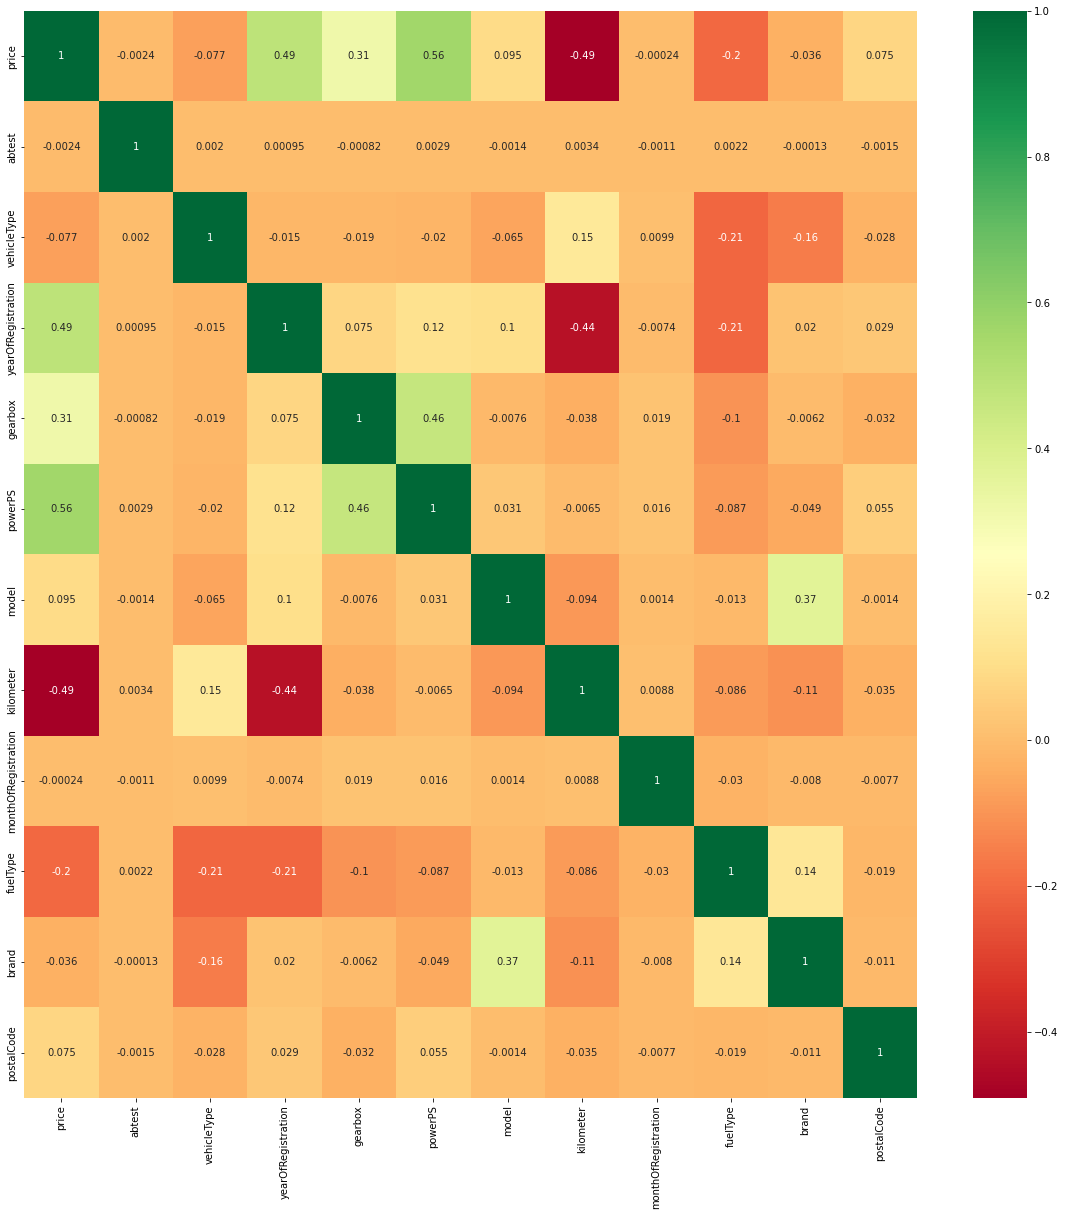

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

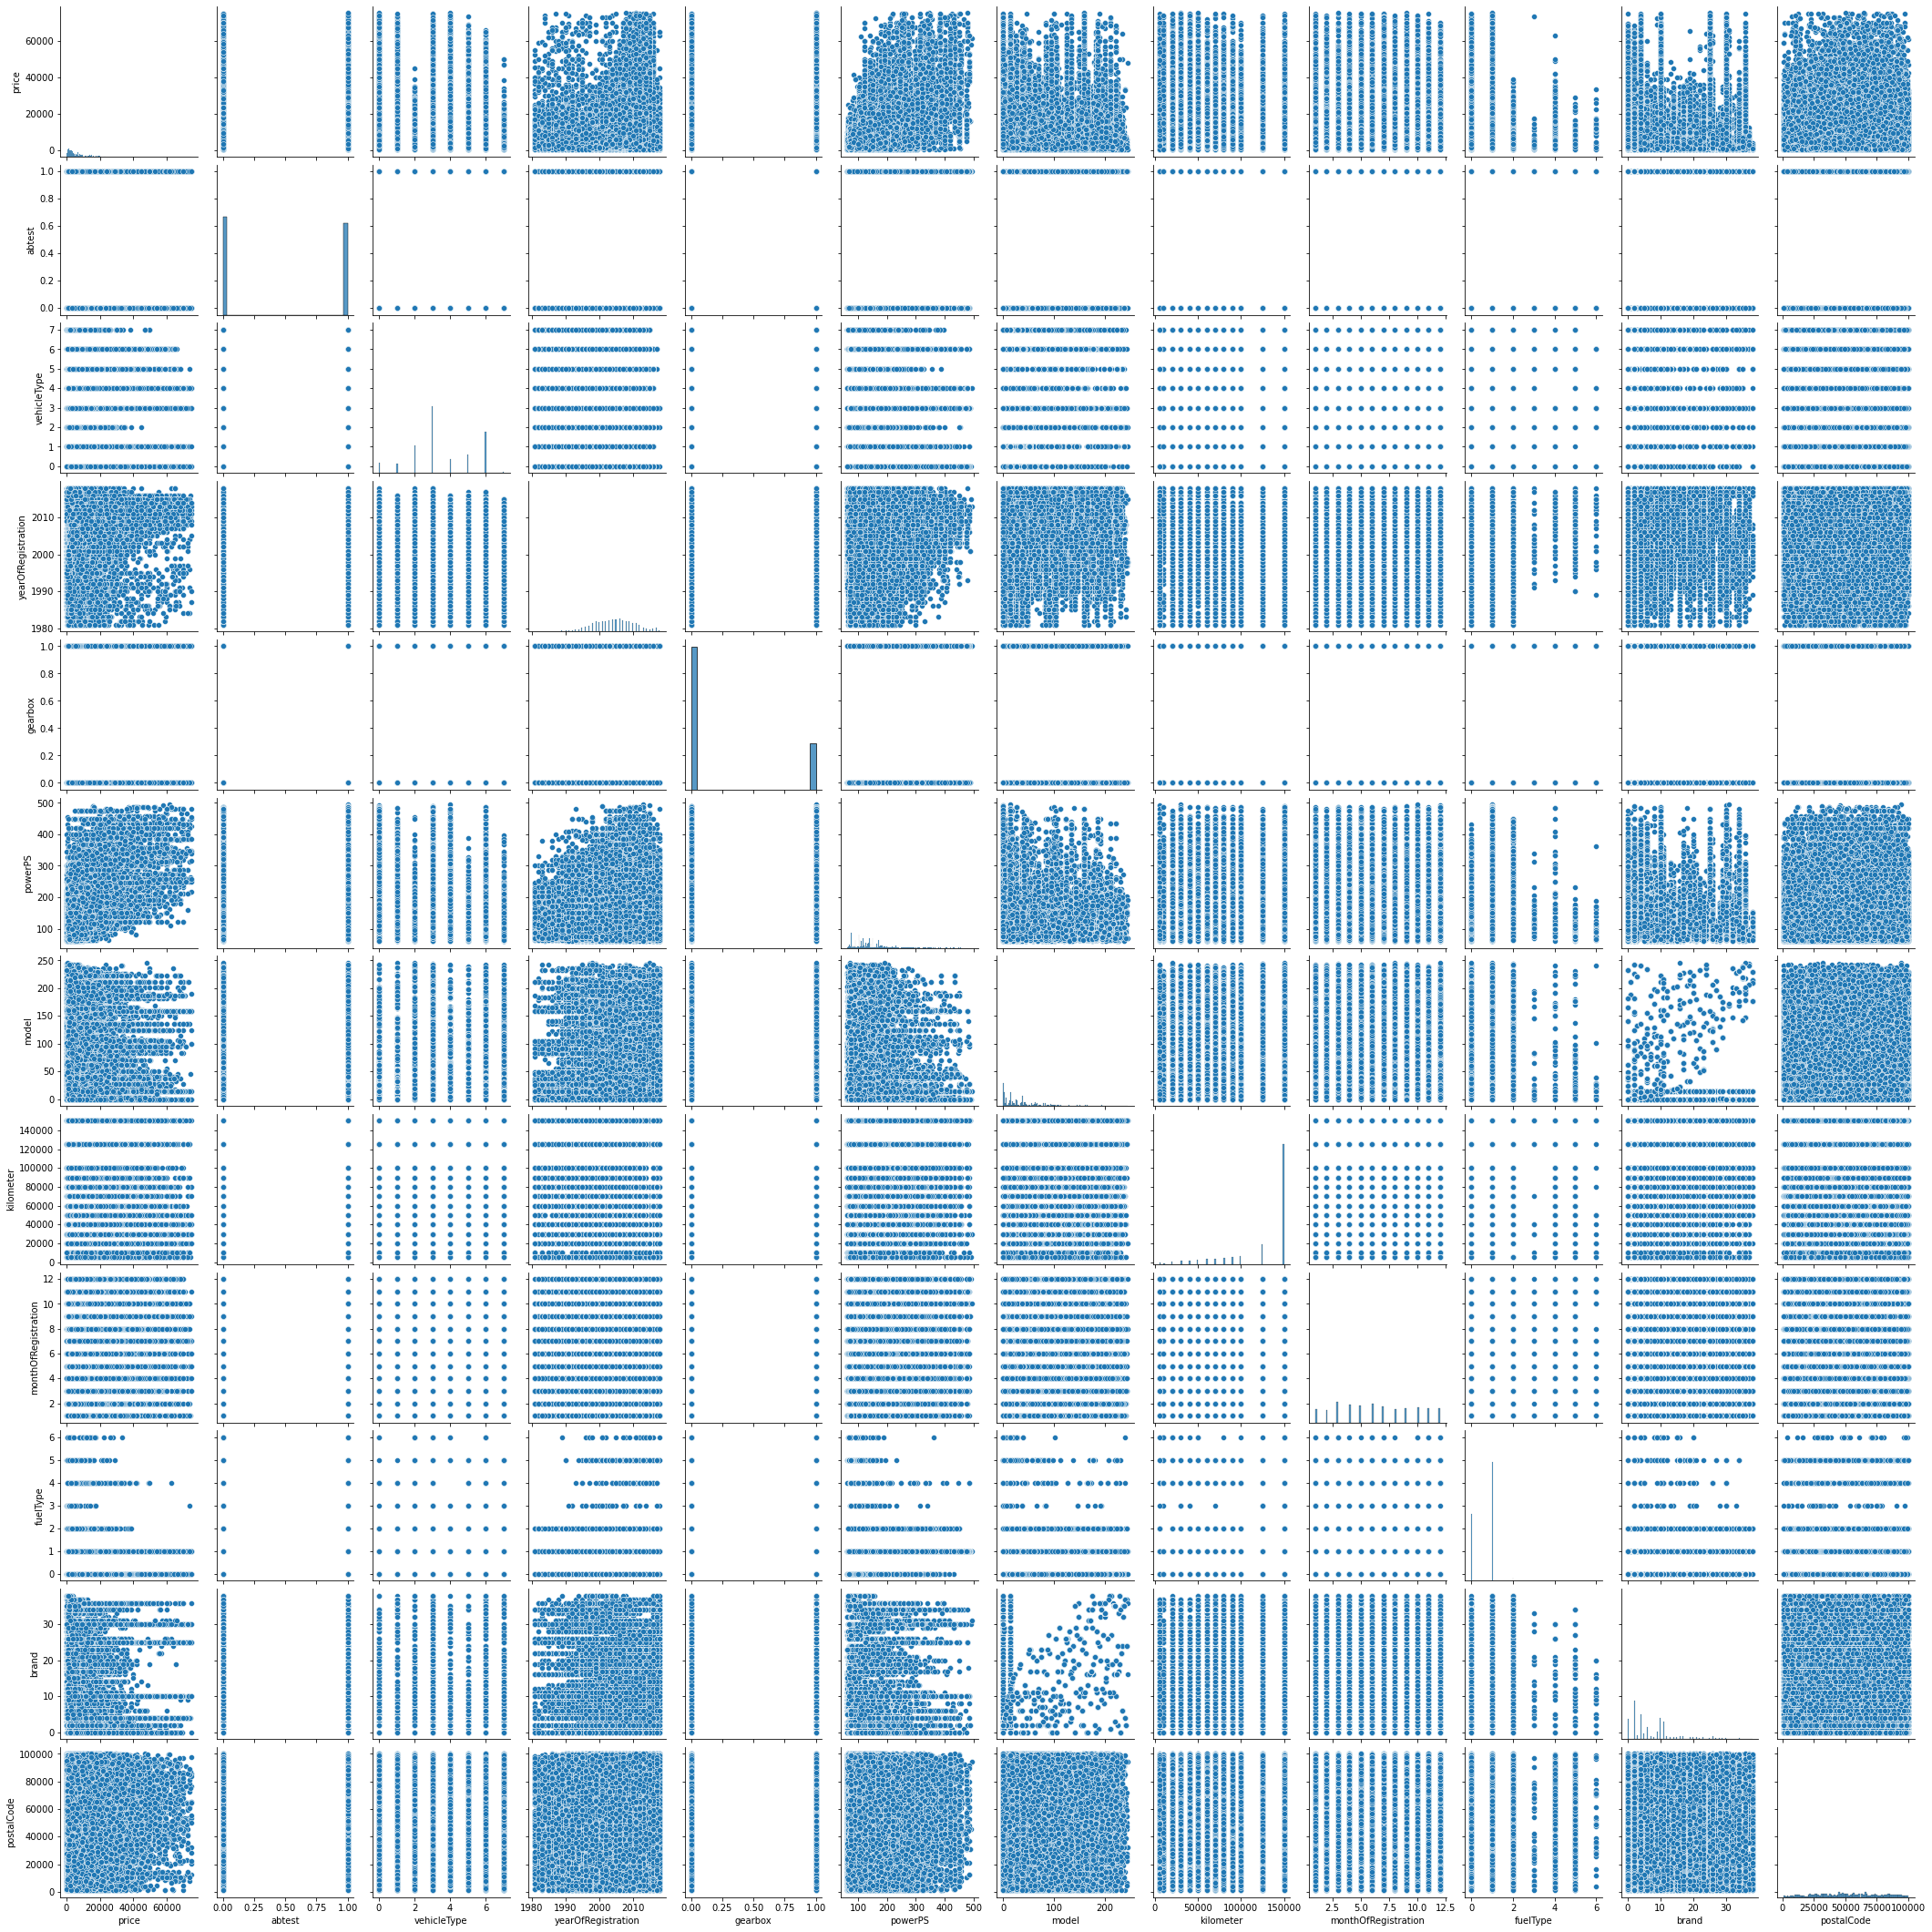

In [59]:
sns.pairplot(df)

<AxesSubplot:xlabel='model', ylabel='Count'>

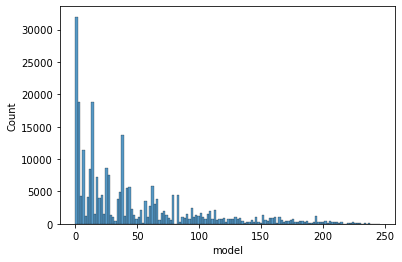

In [60]:
sns.histplot(data=df,x='model')

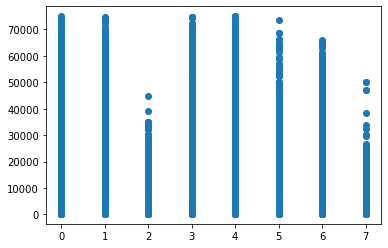

In [61]:
plt.scatter(df.vehicleType,df.price)

<AxesSubplot:xlabel='vehicleType', ylabel='Count'>

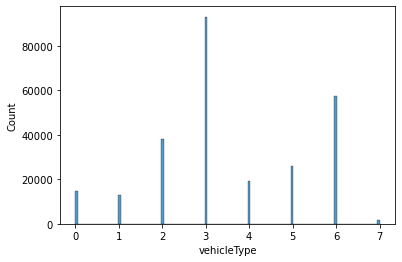

In [62]:
sns.histplot(data=df,x='vehicleType')

## Generate Pickle

In [63]:
file = "finalModel.pkl";
fileObject=open(file,"wb");

In [64]:
pickle.dump(regressor,fileObject);

In [65]:
fileObject.close();

In [66]:
#save Model
fileObject2=open(file,"rb");
model=pickle.load(fileObject2,encoding='binary');
model.fit(X_train,np.ravel(Y_train,order='C'));


In [67]:
model.predict(X_test)

array([ 4107.86447619,  1238.3064246 ,  2769.70511905, ...,
        2712.75384921, 23671.62107143,  3560.91868254])

In [68]:
model.score(X_test,Y_test)

0.8999373513434883

In [69]:
fileObject2.close();

In [70]:

test = [[0,1.0,2004,1.0,163,1.0,125000,8,0.0,1,0,90480]]
model.predict(test)[0]


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


9574.284702380952